In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
import scipy.stats as stats
import matplotlib.ticker

In [6]:
df = pd.read_csv("training_data.csv")


In [18]:
df.sample(100)

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
530,5,3,5,0,1,1,22.1,20.7,91.60,0.000,0,0.0,16.3,100.0,16.0,low_bike_demand
353,3,0,12,0,1,0,4.3,2.8,90.04,0.000,0,0.0,7.1,100.0,14.2,low_bike_demand
570,16,5,10,0,0,1,22.1,17.2,73.64,0.000,0,0.0,18.5,94.3,16.0,high_bike_demand
252,23,2,10,0,1,1,15.4,11.6,78.01,0.000,0,0.0,10.9,44.6,16.0,low_bike_demand
753,9,2,2,0,1,0,-0.9,-4.0,79.80,0.000,0,0.0,5.2,79.3,16.0,low_bike_demand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,3,2,3,0,1,1,10.4,2.9,59.49,0.000,0,0.0,12.4,89.1,16.0,low_bike_demand
177,7,3,9,0,1,1,24.3,23.3,94.60,0.036,0,0.0,12.4,76.2,11.0,low_bike_demand
1473,9,2,3,0,1,1,4.9,-2.1,60.81,0.000,0,0.0,7.1,98.8,16.0,low_bike_demand
1255,17,4,1,0,1,0,7.1,-8.3,32.36,0.000,0,0.0,11.5,24.4,16.0,low_bike_demand


In [11]:
df.describe()

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility
count,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.0,1600.000000,1600.000000,1600.000000,1600.000000
mean,11.37125,3.022500,6.468750,0.033125,0.710000,0.64375,15.210313,7.750750,63.927844,0.122042,0.0,0.042713,13.082500,64.322375,15.344125
std,6.94837,2.012965,3.454741,0.179019,0.453904,0.47904,9.264785,10.026459,19.079419,0.920600,0.0,0.421198,7.756652,32.748869,2.323737
min,0.00000,0.000000,1.000000,0.000000,0.000000,0.00000,-9.100000,-18.400000,15.850000,0.000000,0.0,0.000000,0.000000,0.000000,0.100000
20%,4.00000,1.000000,3.000000,0.000000,0.000000,0.00000,5.760000,-2.100000,45.196000,0.000000,0.0,0.000000,7.000000,24.400000,16.000000
50%,12.00000,3.000000,6.000000,0.000000,1.000000,1.00000,15.500000,8.300000,65.175000,0.000000,0.0,0.000000,12.300000,79.300000,16.000000
max,23.00000,6.000000,12.000000,1.000000,1.000000,1.00000,35.600000,24.300000,99.890000,25.871000,0.0,6.710000,43.800000,100.000000,16.000000


In [21]:
pd.isna(df).count()

hour_of_day       1600
day_of_week       1600
month             1600
holiday           1600
weekday           1600
summertime        1600
temp              1600
dew               1600
humidity          1600
precip            1600
snow              1600
snowdepth         1600
windspeed         1600
cloudcover        1600
visibility        1600
increase_stock    1600
dtype: int64

In [35]:
df_dup = df.drop(df.iloc[:,0:10],axis=1)

In [36]:
df_dup

,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,0,0.0,16.3,31.6,16.0,low_bike_demand
1,0,0.0,23.9,85.7,16.0,low_bike_demand
2,0,0.0,0.0,81.1,16.0,low_bike_demand
3,0,0.0,19.2,0.0,16.0,low_bike_demand
4,0,0.0,10.5,44.6,16.0,low_bike_demand
...,...,...,...,...,...,...
1595,0,0.0,10.6,24.4,16.0,low_bike_demand
1596,0,0.0,9.8,92.1,10.4,low_bike_demand
1597,0,2.0,18.2,79.3,16.0,low_bike_demand
1598,0,0.0,5.8,24.4,16.0,high_bike_demand


In [38]:
df_dup.replace(["low_bike_demand","high_bike_demand"],[0,1],inplace=True)

In [52]:
corr = df_dup[['snow','snowdepth','windspeed','cloudcover','visibility']].corrwith(df_dup['increase_stock'] , method=stats.pointbiserialr)

/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


<Axes: >

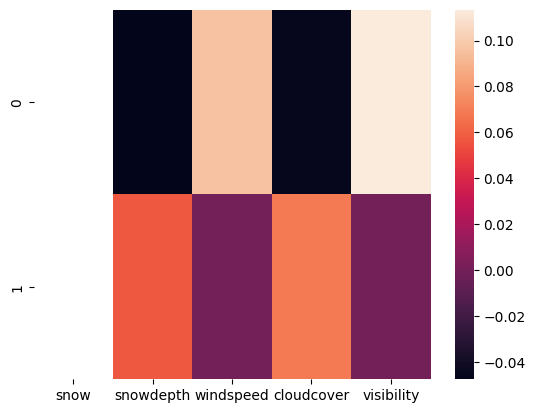

In [53]:
sns.heatmap(corr)

In [55]:
df_dup.snow.sum()

0

<Axes: xlabel='increase_stock', ylabel='windspeed'>

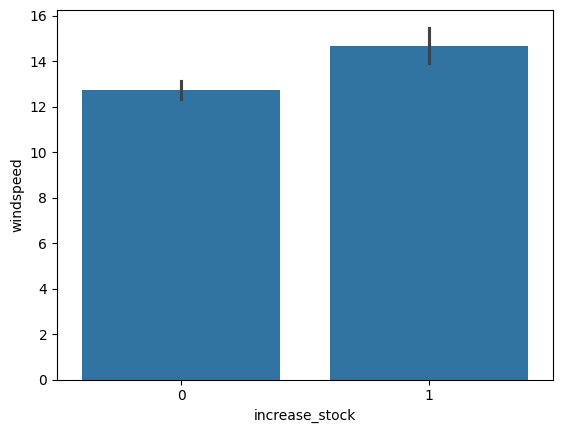

In [60]:
sns.barplot(data=df_dup , y='windspeed' , x = df_dup['increase_stock'] , )

<Axes: xlabel='increase_stock', ylabel='cloudcover'>

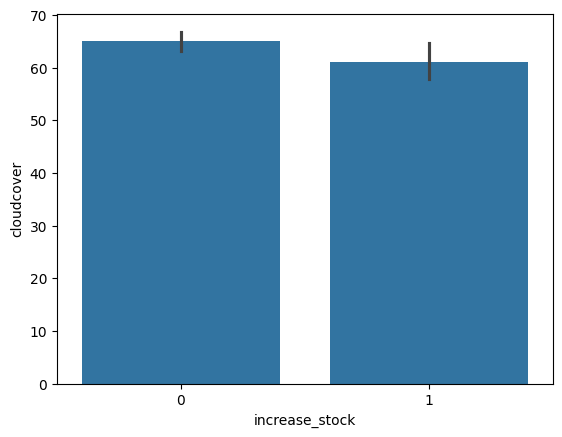

In [61]:
sns.barplot(data=df_dup , y='cloudcover' , x = df_dup['increase_stock'] , )

<Axes: xlabel='increase_stock', ylabel='visibility'>

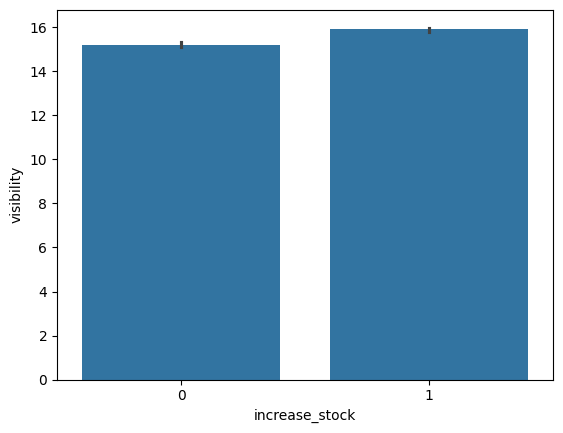

In [63]:
sns.barplot(data=df_dup , y='visibility' , x = df_dup['increase_stock'])

<Axes: xlabel='increase_stock', ylabel='snowdepth'>

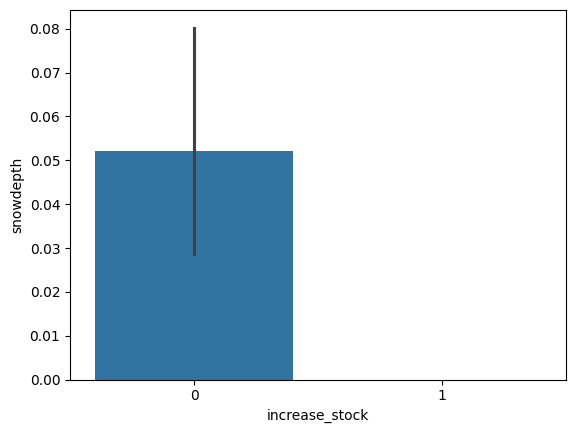

In [64]:
sns.barplot(data=df_dup , y='snowdepth' , x = df_dup['increase_stock'])

<Axes: xlabel='increase_stock', ylabel='windspeed'>

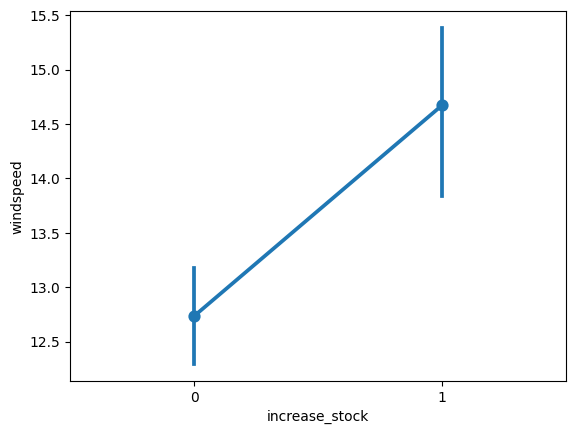

In [69]:
sns.pointplot(data=df_dup , x= 'increase_stock', y='windspeed')

<Axes: xlabel='increase_stock', ylabel='cloudcover'>

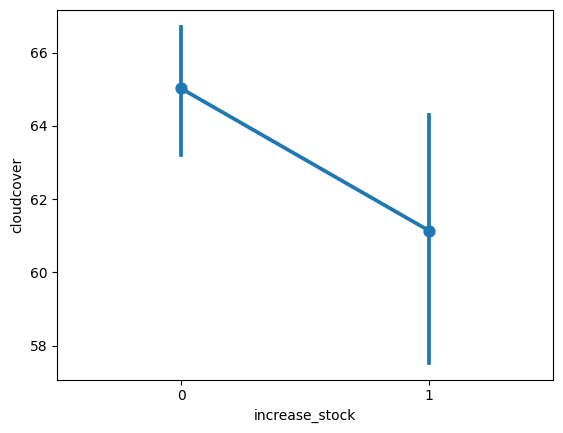

In [70]:
sns.pointplot(data=df_dup , x= 'increase_stock', y='cloudcover')

<Axes: xlabel='increase_stock', ylabel='visibility'>

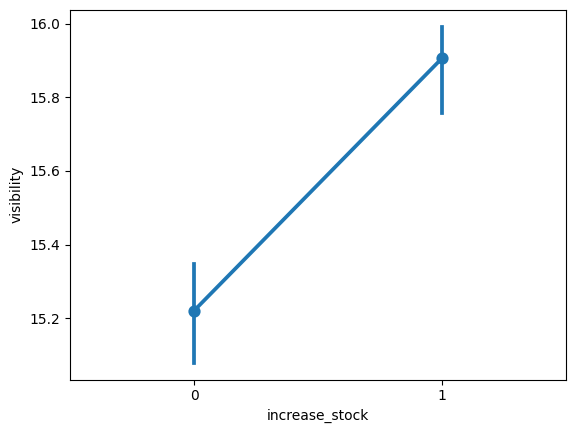

In [71]:
sns.pointplot(data=df_dup , x= 'increase_stock', y='visibility')

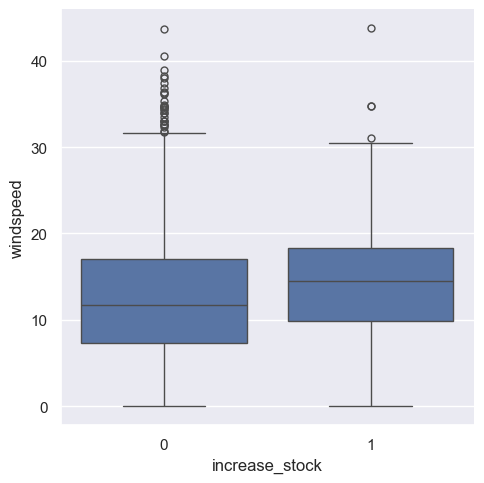

In [96]:
sns.catplot(data=df_dup,x='increase_stock', y='windspeed', kind='box')

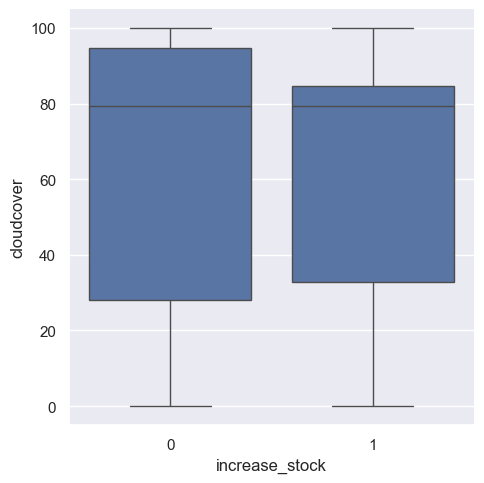

In [97]:
sns.catplot(data=df_dup,x='increase_stock', y='cloudcover', kind='box')


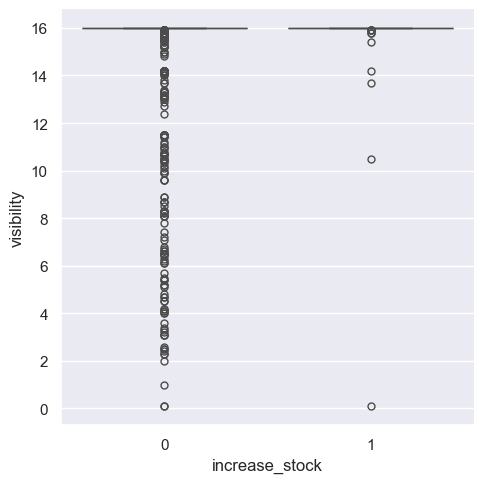

In [98]:
sns.catplot(data=df_dup,x='increase_stock', y='visibility', kind='box')


In [100]:
df.replace(["low_bike_demand","high_bike_demand"],[0,1],inplace=True)

In [131]:
corr = df.corr(method='pearson')

<Axes: >

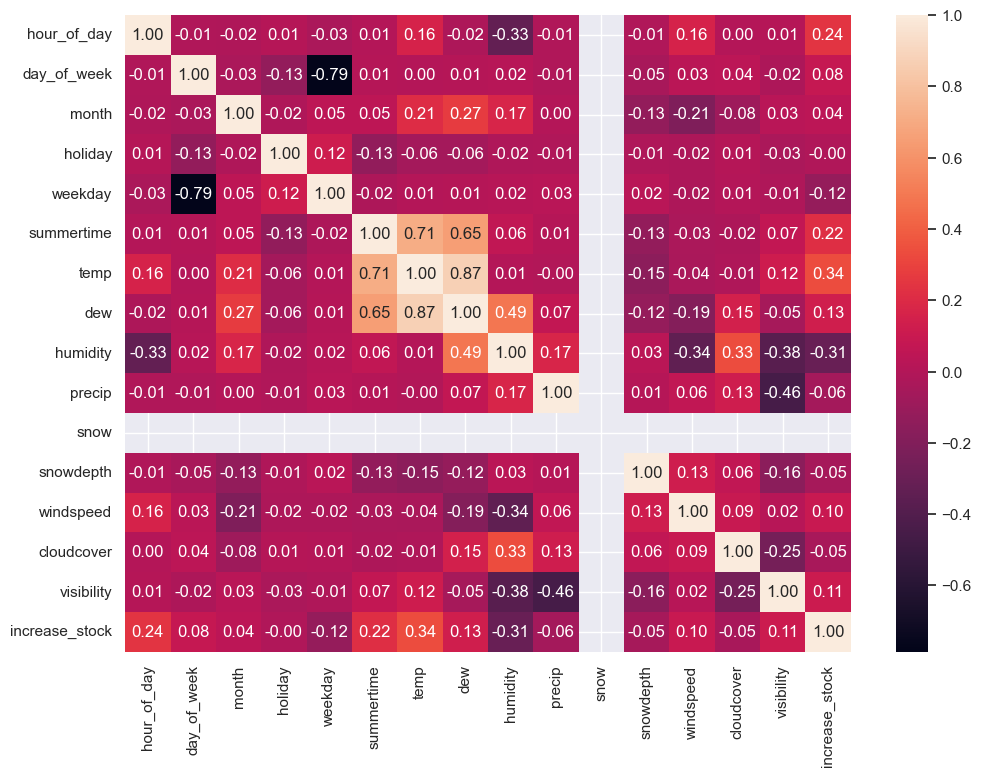

In [132]:
sns.heatmap(corr , annot=True,fmt=".2f",square=False)

In [126]:
corr

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
hour_of_day,1.000000,-0.004361,-0.016194,0.012983,-0.029214,0.005663,0.155611,-0.021234,-0.326735,0.043980,NaN,-0.018366,0.185113,-0.013128,0.071333,0.247322
day_of_week,-0.004361,1.000000,-0.032668,-0.128890,-0.794134,0.010555,0.007747,0.017503,0.014238,0.050258,NaN,0.006190,0.044752,0.050615,-0.008592,0.084586
month,-0.016194,-0.032668,1.000000,-0.017793,0.048633,0.060038,0.214807,0.272504,0.160985,0.013070,NaN,-0.230132,-0.192350,-0.067915,-0.012402,0.039960
holiday,0.012983,-0.128890,-0.017793,1.000000,0.118294,-0.132132,-0.059235,-0.064233,-0.016982,0.032406,NaN,-0.016987,-0.024413,0.025826,0.007233,-0.004909
weekday,-0.029214,-0.794134,0.048633,0.118294,1.000000,-0.023872,-0.000413,0.003158,0.019111,-0.003678,NaN,-0.008809,-0.033264,0.002708,-0.026167,-0.116446
summertime,0.005663,0.010555,0.060038,-0.132132,-0.023872,1.000000,0.707876,0.644529,0.067237,0.003414,NaN,-0.246442,-0.002723,-0.057224,0.034606,0.216052
temp,0.155611,0.007747,0.214807,-0.059235,-0.000413,0.707876,1.000000,0.873143,0.009895,-0.019559,NaN,-0.281987,0.009425,-0.079799,0.052824,0.336680
dew,-0.021234,0.017503,0.272504,-0.064233,0.003158,0.644529,0.873143,1.000000,0.472645,0.143196,NaN,-0.246914,-0.140573,0.100134,-0.163172,0.124170
humidity,-0.326735,0.014238,0.160985,-0.016982,0.019111,0.067237,0.009895,0.472645,1.000000,0.378591,NaN,-0.003899,-0.343585,0.378327,-0.512628,-0.302049
precip,0.043980,0.050258,0.013070,0.032406,-0.003678,0.003414,-0.019559,0.143196,0.378591,1.000000,NaN,0.074582,0.040323,0.348608,-0.487684,-0.111202
